# **Costa Rica** - 283525

#### Analisis de datos de las importaciones de NCM 283526 (Fosfatos de Calcio) del ultimo año.

> Análisis exploratorio inicial del de las Importaciones de Costa Rica (01/2022 - 12/2022). Los datos fueron extraidos el 20/01/2022 a las 18:00 hs.

---


# Parte 1

#### Data imports, y librerías necesarias para trabajar

> También elimino los limites de visualizacion para poder interpretar los datos, y creo la configuracion de Google Colaboratory


In [1]:
import pandas as pd
import numpy as np
import warnings
# from google.colab import drive

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# !pwd
# !cd drive

# drive.mount('/content/drive')

warnings.simplefilter("ignore")

data_location = "./data/283526_Importaciones_01-12:2022.xlsx"

data = pd.read_excel(data_location, engine="openpyxl")

print(
    f"> Este dataframe tiene (filas, col):\n {data.shape}\n- - - - - - - - - -")

data.sample(1)


> Este dataframe tiene (filas, col):
 (324, 48)
- - - - - - - - - -


,Ordinal,Item,Fecha,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,Modelo,Factura,Código SAC,Vía Transporte,País de Origen,Pais de Procedencia,Pais de Adquisición,Cantidad Comercial,Unidad de Medida,Volúmen Físico,UVF,Bultos,U$S FOB,U$S FOB Unit.,U$S Flete,U$S Seguro,U$S CIF,U$S Unitario,V. Aduana U$S,Kgs. Netos,Kgs. Brutos,Descripción de Mercadería,Nro. Declaración,Declarante,Nro. Agencia,Agente,Cod. Loc.,Localización,IVA - U$S,%,Ley 6946 U$S,%.1,DAI U$S,%.2,PROCOMER U$S,%.3,S.C. U$S,%.4,Otros Imp. U$S
276,005-2022-481450,15,2022-11-03,SANTAMARIA,IMPORTACION DEFINITIVA,"LIQUIDACION DAI, L6946 INSUMOS VL EMPRESA ZF C...",PANIFRESH COSTA RICA SOCIEDAD ANONIMA,No disponible,SM,SM,0000076151,283526000000,TERRESTRE,Costa Rica,Costa Rica,Costa Rica,0.1,KILOGRAMO,0.1,11,1,0.32,3.2,0.0,0.0,0.32,3.2,0.32,0.1,0.1,FOSFATO MONOCALCICO,310103101818,GRUPO SERVICA COSTA RICA SOCIEDAD ANONIMA,110090598,RUIZ HERNANDEZ KAREN DE LOS ANGELES,H719,PANIFRESH COSTA RICA SOCIEDAD ANONIMA,0.04,"13,000",0.0,"0,000",0,"0,000",0,"0,000",0,"0,000",0.0


In [2]:
data_cols = [col for col in data.columns]

print(
    f"\033[1m\nEsta bbdd tiene los siguientes datos:\n\n\033[0m{data_cols} \n\n- - - - - - - - - - - - - - - - -\n")



Esta bbdd tiene los siguientes datos:

['Ordinal', 'Item', 'Fecha', 'Aduana', 'Regimen', 'Modalidad', 'Importador', 'Proveedor', 'Marca', 'Modelo', 'Factura', 'Código SAC', 'Vía Transporte', 'País de Origen', 'Pais de Procedencia', 'Pais de Adquisición', 'Cantidad Comercial', 'Unidad de Medida', 'Volúmen Físico', 'UVF', 'Bultos', 'U$S FOB', 'U$S FOB Unit.', 'U$S Flete', 'U$S Seguro', 'U$S CIF', 'U$S Unitario', 'V. Aduana U$S', 'Kgs. Netos', 'Kgs. Brutos', 'Descripción de Mercadería', 'Nro. Declaración', 'Declarante', 'Nro. Agencia', 'Agente', 'Cod. Loc.', 'Localización', 'IVA - U$S', '%', 'Ley 6946 U$S', '%.1', 'DAI U$S', '%.2', 'PROCOMER U$S', '%.3', 'S.C. U$S', '%.4', 'Otros Imp. U$S'] 

- - - - - - - - - - - - - - - - -



#### Reviso si hay datos faltantes


In [3]:
# Se ordenan jerarquicamente, en caso de haber alguno, aparece primero.
is_null_result = data.isnull().sum().sort_index()

print(
    f"\033[1m\nCantidad de valores que faltan ser completados:\n\n\033[0m {is_null_result}")



Cantidad de valores que faltan ser completados:

 %                            0
%.1                          0
%.2                          0
%.3                          0
%.4                          0
Aduana                       0
Agente                       0
Bultos                       0
Cantidad Comercial           0
Cod. Loc.                    0
Código SAC                   0
DAI U$S                      0
Declarante                   0
Descripción de Mercadería    0
Factura                      0
Fecha                        0
IVA - U$S                    0
Importador                   0
Item                         0
Kgs. Brutos                  0
Kgs. Netos                   0
Ley 6946 U$S                 0
Localización                 0
Marca                        0
Modalidad                    0
Modelo                       0
Nro. Agencia                 0
Nro. Declaración             0
Ordinal                      0
Otros Imp. U$S               0
PROCOMER U$S       

### Despues de estudiar los datos, me doy cuenta que hay campos no rellenados pero que utilizan nomenclatura para indicar ausencia, como:

> - No disponible
> - NO DISPONIBLE
> - S/M
> - SIN MARCA
> - Sin marca

#### Creo un regex por si tengo que filtrar datos con alguna de estas:

> `regex_pattern = "/[nNsS][oOiI|\/](\s|[nN]|[Mm])|([dD|MmaAiIsS])/g"`


In [4]:
print(
    f"\033[1m\nEsta bbdd tiene X registros de los siguientes Importadores en el ultimo año (2022): \n\n\033[0m {data['Importador'].value_counts()}\n \n- - - - - - - - - - - - - - - - -")



Esta bbdd tiene X registros de los siguientes Importadores en el ultimo año (2022): 

 PANIFRESH COSTA RICA SOCIEDAD ANONIMA         157
VITAMINAS Y MINERALES SOCIEDAD ANONIMA         40
FARYVET SOCIEDAD ANONIMA                       17
DISTRIBUIDORA EL ARMENIO SOCIEDAD ANONIM       15
CARTASA DE SOL SOCIEDAD ANONIMA                10
COMPAÃÂIA DE GALLETAS POZUELO DCR SOCIED      9
QUIMICA MACIAS SOCIEDAD ANONIMA                 8
J M ESQUIVEL LIMITADA                           7
JAVA CENTROAMERICANA AIME SOCIEDAD ANONI        5
SENSIENT COSTA RICA SOCIEDAD DE RESPONSA        5
CP CIENCIAS PECUARIAS SOCIEDAD ANONIMA          5
BIMBO DE COSTA RICA SOCIEDAD ANONIMA            5
ABONOS DEL PACIFICO SOCIEDAD ANONIMA            4
CALOX DE COSTA RICA SOCIEDAD ANONIMA            4
GUTIS, LIMITADA                                 4
LABORATORIOS STEIN SOCIEDAD ANONIMA             4
LABORATORIO RAVEN SOCIEDAD ANONIMA              3
BIOMAR AQUACORPORATIOON PRODUCTS, SOCIED        2
LABORATORIOS

### Limpieza de datos, y data wrangling

1. Armo una base de datos separada con las columnas que voy a usar, y descarto las que no.
2. Descarto las importaciones que se hayan hecho por via de transporte aerea, o que tengan menos de 15 toneladas.
3. Filtro los precios cuyo precio unitario sea mayor a $1600 U$S/Tonelada.
4. Estandarizo el formato de la fecha, para poder realizar busquedas semestrales.


In [5]:
# Creo un df nuevo con los datos que voy a utilizar
df_new = data.loc[:, ['Código SAC',  'Fecha', 'Aduana', 'Importador', 'Proveedor', 'Marca', 'Modelo',  'Vía Transporte',
                      'País de Origen', 'Pais de Procedencia', 'Pais de Adquisición', 'Cantidad Comercial', 'Unidad de Medida',
                      'U$S Flete', 'U$S Seguro', 'U$S CIF', 'U$S Unitario', 'V. Aduana U$S', 'Kgs. Netos', 'Kgs. Brutos', ]]

# Estadisticos exploratorios de nuestro dataframe
# df_new.info()

print(
    f"\n> El ultimo año tiene (filas, cols):\n\n{df_new.shape} \n\n- - - - - - - - -\n")

# Se eliminan los elementos que vengan por aire porque el precio no es representativo
df_new.drop(df_new[df_new['Vía Transporte'] == 'AEREA'].index, inplace=True)

# Volvemos a crear la columna de precio unitario para estandarizar las unidades
df_new["U$S Unitario"] = (df_new['U$S CIF'] / df_new['Kgs. Netos']).round(2)

# Filtramos el precio para buscar al cliente target
df_new_filtered = df_new.loc[(df_new['U$S Unitario'] <= 1.6)]

# Convertimos a dtype date para poder utilizar las facilidades de tipado que Python brinda
df_new_filtered['Fecha'] = pd.to_datetime(df_new['Fecha'], format='%Y-%m-%d')

# Reviso que no me haya quedado ningun producto que haya sido transportado en via aerea
# print(df_new_filtered['Vía Transporte'].value_counts())

df_new_filtered.sample(1)



> El ultimo año tiene (filas, cols):

(324, 20) 

- - - - - - - - -



,Código SAC,Fecha,Aduana,Importador,Proveedor,Marca,Modelo,Vía Transporte,País de Origen,Pais de Procedencia,Pais de Adquisición,Cantidad Comercial,Unidad de Medida,U$S Flete,U$S Seguro,U$S CIF,U$S Unitario,V. Aduana U$S,Kgs. Netos,Kgs. Brutos
258,283526000000,2022-10-13,DE LIMON,DISTRIBUIDORA EL ARMENIO SOCIEDAD ANONIM,TUNIFEED,SM,SM,MARITIMO,Túnez,Túnez,Túnez,130.0,UNID. INEXISTENTE,0.0,0.0,40560.0,1.56,40560.0,26000.0,26083.0


#### Sobre esa, armo otra base de datos separada para armar el analisis de venta semestral.


In [6]:
# Creo un df nuevo con el ultimo semestre del 2022
df_6months = df_new_filtered.loc[(
    df_new_filtered['Fecha'] > "2022-05-31") & (df_new_filtered['Fecha'] <= "2022-12-31")]

print(
    f"\033[1m\n> Los 6 ultimos meses con productos de U$S Unitario <= 1600 tienen (filas, cols):\033[0m\n\n {df_6months.shape} \n\n- - - - - - - - -")

print(
    f"\033[1m\n> De U$S Unitario(<=1600) en los ultimos 6 meses tenemos los siguientes estadisticos:\n\033[0m\n {df_6months['U$S Unitario'].describe().round(2)} \n\n- - - - - - - - -\n")

print(
    f"\033[1m\n> El ultimo año con productos de U$S Unitario <= 1600 tienen (filas, cols):\033[0m\n\n {df_new_filtered.shape}\n\n- - - - - - - - -")

print(
    f"\033[1m\n> De U$S Unitario(<=1600) en el ultimo año tenemos los siguientes estadisticos:\n\033[0m\n {df_new_filtered['U$S Unitario'].describe().round(2)}\n\n- - - - - - - - -\n")

# df_new_filtered.sample(3)



> Los 6 ultimos meses con productos de U$S Unitario <= 1600 tienen (filas, cols):

 (67, 20) 

- - - - - - - - -

> De U$S Unitario(<=1600) en los ultimos 6 meses tenemos los siguientes estadisticos:

 count    67.00
mean      1.30
std       0.19
min       0.61
25%       1.22
50%       1.31
75%       1.40
max       1.58
Name: U$S Unitario, dtype: float64 

- - - - - - - - -


> El ultimo año con productos de U$S Unitario <= 1600 tienen (filas, cols):

 (105, 20)

- - - - - - - - -

> De U$S Unitario(<=1600) en el ultimo año tenemos los siguientes estadisticos:

 count    105.00
mean       1.21
std        0.21
min        0.61
25%        1.05
50%        1.22
75%        1.34
max        1.58
Name: U$S Unitario, dtype: float64

- - - - - - - - -



<AxesSubplot: title={'center': 'U$S Unitario (2022)'}>

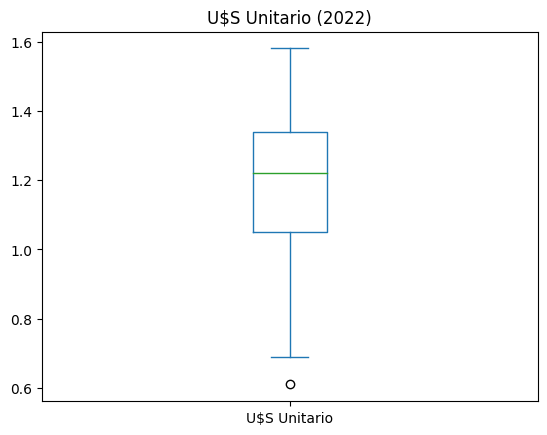

In [19]:
# df_6months['U$S Unitario'].dtype
df_new_filtered['U$S Unitario'].plot(kind='box', title="U$S Unitario (2022)")


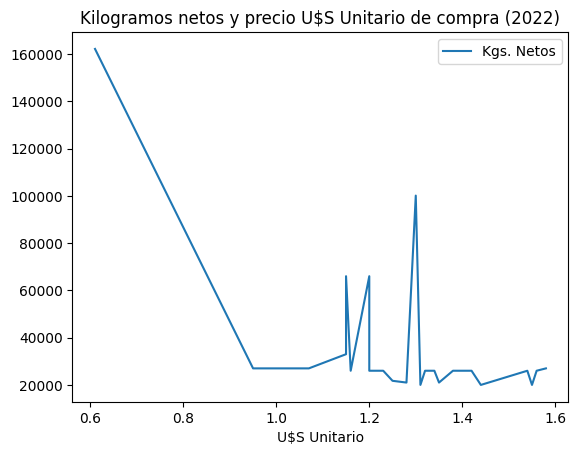

In [18]:
# Ordeno los valores por precio para graficar
df_6months_filtered = df_6months.sort_values(
    'U$S Unitario', ascending=False).plot.line(x="U$S Unitario", y="Kgs. Netos",
                                               title="Kilogramos netos y precio U$S Unitario de compra (2022)")

# Vuelvo a ordenar los valores por vol de transacción
df_6months_filtered = df_6months.sort_values(
    'Kgs. Netos', ascending=False)


In [9]:
print(
    f"\033[1m\n> Esta bbdd es un recorte de los ultimos 6 meses, y tiene los siguientes Importadores (nombre, no. importaciones):\n\n\033[0m{df_6months_filtered['Importador'].value_counts()} \n\n- - - - - - - - - - - - - - - - -")



> Esta bbdd es un recorte de los ultimos 6 meses, y tiene los siguientes Importadores (nombre, no. importaciones):

VITAMINAS Y MINERALES SOCIEDAD ANONIMA        22
FARYVET SOCIEDAD ANONIMA                      13
CARTASA DE SOL SOCIEDAD ANONIMA               10
DISTRIBUIDORA EL ARMENIO SOCIEDAD ANONIM      10
CP CIENCIAS PECUARIAS SOCIEDAD ANONIMA         4
ABONOS DEL PACIFICO SOCIEDAD ANONIMA           3
INZOOSA COMERCIAL CR SOCIEDAD ANONIMA          2
COMPAÃÂIA VETERINARIA DE IMPORTACIONES V     1
NUTRIMAX PECUARIA SOCIEDAD ANONIMA             1
COMERCIALIZADORA DE PRODUCTOS AGROPECUAR       1
Name: Importador, dtype: int64 

- - - - - - - - - - - - - - - - -


# Parte 2

#### Desglose por compañia de las importaciones de los ultimos 6 meses. Este incluye:

- Nombre de la compañia
- Cantidad de importaciones
- Proveedores, y cantidad de importaciones por proveedor
- Precio promedio de compra por unidad en los ultimos 6 meses
- Volumen total neto de compra en los ultimos 6 meses
- Detalles de la ultima compra realizada


In [10]:
# FX DEVUELVE DETALLES DE IMPORTADOR

def last_year_data():
    global dataframe_toExcel

    companias_mayores_15tm = []

    dataframe_toExcel = {
        "NCM/NANDINA/SACH": [],
        "Importador": [],
        "No. Importaciones": [],
        "Volumen Total (Tn)": [],
        "Precio Promedio": [],
        "Ultimo Precio": [],
        "Proveedores": [],
        "Origenes": [],
        "Ref. Ultima Compra": [],
        "Participacion en Vol. Total": []
    }

    for company in df_new_filtered['Importador'].unique():
        # Mascara booleana para seleccionar compañía por compañía
        data = df_new_filtered[df_new_filtered['Importador']
                               == f"{company}"]

        # Volumen total de importaciones anual de Costa Rica para NCM 283526
        volumenTotalImportacionTn = (
            df_new_filtered['Kgs. Netos'].sum()/1000).round(2)

        if (data['Kgs. Netos'].sum() > 15000):
            # Lista de compañías que superan el umbral
            companias_mayores_15tm.append(company)

            # Volumen total de todas las importaciones en toneladas
            volumenTotalCompania = (
                data['Kgs. Netos'].sum()/1000).round(2)

            # Guardo el NCM sin 0s finales
            ncmNoTrailZeroes = str(data._get_value(
                0, 0, takeable=True)).rstrip('0')

            # Agrego los valores iterados al diccionario
            dataframe_toExcel['NCM/NANDINA/SACH'].append(
                int(ncmNoTrailZeroes)
            )
            dataframe_toExcel['Importador'].append(company)
            dataframe_toExcel['No. Importaciones'].append(len(data))
            dataframe_toExcel['Volumen Total (Tn)'].append(
                (data['Kgs. Netos'].sum()/1000).round(2))
            dataframe_toExcel['Precio Promedio'].append(
                (data['U$S Unitario'].mean().round(2))*1000)
            dataframe_toExcel['Proveedores'].append(
                ', '.join(data['Proveedor'].unique().tolist()))
            dataframe_toExcel['Origenes'].append(
                ', '.join(data['País de Origen'].unique().tolist()))

            data = data.sort_values('Fecha', ascending=False)
            fecha_ultima_compra = data['Fecha'].iloc[0]
            data_ultima_compra = data[data['Fecha'] == fecha_ultima_compra]

            dataframe_toExcel['Ultimo Precio'].append(
                (data_ultima_compra['U$S Unitario']._get_value(0, ':,-1'))*1000)
            dataframe_toExcel['Ref. Ultima Compra'].append(
                f"Fecha: {fecha_ultima_compra.date()} | Proveedor: {''.join(data_ultima_compra['Proveedor'].unique())} | Ctdad: {(data_ultima_compra['Kgs. Netos'].sum()/1000).round(2)} tns"
            )
            dataframe_toExcel['Participacion en Vol. Total'].append(
                f"{round((volumenTotalCompania / volumenTotalImportacionTn) * 100)}%"
            )

            # Imprimo los detalles de la compañía que el loop está iterando
            print(
                f"\033[1m> Nombre de la compañía:\n \033[0m {company}\n- - - - - - - - - -\n")

            print(
                f"\033[1m> Sus proveedores fueron:\033[0m \n {data['Proveedor'].value_counts()}\n- - - - - - - - - -\n")

            print(
                f"\033[1m> El precio promedio de U$S Unitario en el ultimo año fue:\033[0m {data['U$S Unitario'].mean().round(2)}\n- - - - - - - - - -\n")

            print(
                f"\033[1m> El volumen total de compra en TONELADAS fue de:\033[0m {(data['Kgs. Netos'].sum()/1000).round(2)}\n- - - - - - - - - -\n")

            print(
                f"\033[1m> Las compras provienen de: \n\033[0m{data['País de Origen'].value_counts()}\n- - - - - - - - - -\n")

            print(
                f"\033[1m> Detalles de la ultima compra:\033[0m \n {data_ultima_compra}\n")

            print(
                f"\033[1m\n__________________________________________________________________________________\n")

    # Agrupo las compañías que cruzaron el umbral de las 15 toneladas
    print(
        f"\033[1m> Las companias con mas de 15 tm en el ultimo semestre fueron:\033[0m {companias_mayores_15tm} ")
    print(
        f"\033[1m\n__________________________________________________________________________________\n")


last_year_data()

# Creo un df con los datos finales del diccionario para poder exportar al Google Sheets
excel_new_data = pd.DataFrame.from_records(
    dataframe_toExcel).sort_values('Volumen Total (Tn)', ascending=False).reset_index(drop=True)

# Ordeno las columnas segun el orden que me interesa poner en display
excel_new_data = excel_new_data[['NCM/NANDINA/SACH', 'Importador', 'Volumen Total (Tn)', 'No. Importaciones',
                                 'Precio Promedio', 'Ultimo Precio', 'Ref. Ultima Compra', "Participacion en Vol. Total", 'Origenes', 'Proveedores']]

excel_new_data


> Nombre de la compañía:
  ABONOS DEL PACIFICO SOCIEDAD ANONIMA
- - - - - - - - - -

> Sus proveedores fueron: 
 INCOFE - Internat. Coffee & Fe    4
Name: Proveedor, dtype: int64
- - - - - - - - - -

> El precio promedio de U$S Unitario en el ultimo año fue: 1.05
- - - - - - - - - -

> El volumen total de compra en TONELADAS fue de: 229.0
- - - - - - - - - -

> Las compras provienen de: 
China    4
Name: País de Origen, dtype: int64
- - - - - - - - - -

> Detalles de la ultima compra: 
        Código SAC      Fecha      Aduana  \
194  283526000000 2022-08-11  DE CALDERA   
195  283526000000 2022-08-11  DE CALDERA   

                               Importador                       Proveedor  \
194  ABONOS DEL PACIFICO SOCIEDAD ANONIMA  INCOFE - Internat. Coffee & Fe   
195  ABONOS DEL PACIFICO SOCIEDAD ANONIMA  INCOFE - Internat. Coffee & Fe   

       Marca Modelo Vía Transporte País de Origen Pais de Procedencia  \
194  INCOFEE    REF       MARITIMO          China               China 

,NCM/NANDINA/SACH,Importador,Volumen Total (Tn),No. Importaciones,Precio Promedio,Ultimo Precio,Ref. Ultima Compra,Participacion en Vol. Total,Origenes,Proveedores
0,283526,VITAMINAS Y MINERALES SOCIEDAD ANONIMA,956.10,34,1210.0,1320.0,Fecha: 2022-11-25 | Proveedor: TUNIFEED S.A.R....,38%,"Suiza, Túnez, China","EUROCHEM NORTH AMERICA CORP, TUNIFEED S.A.R.L,..."
1,283526,FARYVET SOCIEDAD ANONIMA,387.00,17,1170.0,950.0,Fecha: 2022-11-29 | Proveedor: RIVETO LLC | Ct...,16%,"República Dominicana, China","VITUSA CORP, GLOBE INGREDIENTS BV, RIVETO LLC"
2,283526,CARTASA DE SOL SOCIEDAD ANONIMA,260.00,10,1290.0,1220.0,Fecha: 2022-11-04 | Proveedor: TUNIFEED S.A.R....,10%,Túnez,TUNIFEED S.A.R.L.
3,283526,DISTRIBUIDORA EL ARMENIO SOCIEDAD ANONIM,260.00,10,1450.0,1340.0,Fecha: 2022-11-10 | Proveedor: TUNIFEED | Ctda...,10%,"Túnez, Turquía",TUNIFEED
4,283526,ABONOS DEL PACIFICO SOCIEDAD ANONIMA,229.00,4,1050.0,1150.0,Fecha: 2022-08-11 | Proveedor: INCOFE - Intern...,9%,China,INCOFE - Internat. Coffee & Fe
5,283526,COMPAÃÂIA VETERINARIA DE IMPORTACIONES V,195.26,2,860.0,610.0,Fecha: 2022-07-05 | Proveedor: MIDI FEED BIOTE...,8%,China,"SOLINC INDUSTRIAL CO., LIMITED, MIDI FEED BIOT..."
6,283526,CP CIENCIAS PECUARIAS SOCIEDAD ANONIMA,104.74,5,1350.0,1250.0,Fecha: 2022-12-12 | Proveedor: GLOBAL FEED S.L...,4%,"España, Estados Unidos","GLOBAL FEED S.L.U., Trouw Nutrition"
7,283526,INZOOSA COMERCIAL CR SOCIEDAD ANONIMA,52.00,2,1420.0,1420.0,Fecha: 2022-10-07 | Proveedor: STEP S.A.R.L. |...,2%,Túnez,STEP S.A.R.L.
8,283526,NUTRIMAX PECUARIA SOCIEDAD ANONIMA,26.00,1,1160.0,1160.0,Fecha: 2022-12-27 | Proveedor: STEP S.A.R.L. |...,1%,Túnez,STEP S.A.R.L.
9,283526,COMERCIALIZADORA DE PRODUCTOS AGROPECUAR,20.00,1,1550.0,1550.0,Fecha: 2022-07-18 | Proveedor: DESARROLLO Y NU...,1%,Finlandia,DESARROLLO Y NUTRICION ANIMAL


# Parte 3

## Automatizando el export de los resultados del analisis a Google Sheets

#### Esto es posible gracias a la librería "gspread" de Google, y la Google API.

> Las credenciales de acceso están ocultas por razones obvias. Mucho más en como utilizarlo en:
>
> > https://docs.gspread.org/en/latest/oauth2.html


In [11]:
import os
import json
import gspread as gs

# Guardo el nombre de la carpeta en la que estoy trabajando para despues utilizarla como id en gspread, y guardo las credenciales para autenticar el acceso a Google Drive
CURRENT_WD = os.getcwd()
COUNTRY_WD = (os.path.basename(CURRENT_WD).split('/')[-1]).upper()
CREDENTIALS = '../service-credentials.json'

# Autenticación, e instancio el handler
gc = gs.service_account(filename=CREDENTIALS)
sh = gc.open('eda-gspread')

worksheet_list = sh.worksheets()

print(
    f"\033[1m> Las hojas del excel actualmente son:\033[0m\n {worksheet_list}\n- - - - - - - - - -\n")


> Las hojas del excel actualmente son:
 [<Worksheet 'PERU' id:2135551572>, <Worksheet 'ARGENTINA' id:419124589>, <Worksheet 'URUGUAY' id:1942250840>]
- - - - - - - - - -



In [12]:
# En caso de que la hoja del Sheets ya exista, la modifica; caso contrario, la crea y agrega el dataframe
try:
    ws = sh.worksheet(f'{COUNTRY_WD}')
    print("Spreadsheet exists: Modifying existing working sheet...\n- - - - - - - - - -\n")
    # ws.clear()
    df_values = excel_new_data.values.tolist()
    sh.values_append(f'{COUNTRY_WD}', {'valueInputOption': 'RAW'}, {
                     'values': df_values})
    print("> Spreadsheet modified.\n- - - - - - - - - -\n")
except gs.exceptions.WorksheetNotFound:
    print("Spreadsheet doesn't exist: Creating, and modifying the new worksheet...\n- - - - - - - - - -\n")
    sh.add_worksheet(title=f"{COUNTRY_WD}", rows=100, cols=12)
    print("> Spreadsheet created.\n- - - - - - - - - -\n")
    ws = sh.worksheet(f'{COUNTRY_WD}')
    ws.update([excel_new_data.columns.values.tolist()] +
              excel_new_data.values.tolist())
    print("> Spreadsheet modified.\n- - - - - - - - - -\n")


Spreadsheet doesn't exist: Creating, and modifying the new worksheet...
- - - - - - - - - -

> Spreadsheet created.
- - - - - - - - - -

> Spreadsheet modified.
- - - - - - - - - -



---

#### En esta parte se responden preguntas especificas usando datos anuales y semestrales.

- Cuanto volumen importo cada compañia peruana en el ultimo año, y semestre?


In [13]:
# df_new_filtered | df_6months_filtered
print("\033[1m\n ~ ULTIMO AÑO (2022) ~ \033[0m\n\n- - - - - - - - -")

print("\033[1m\n> El ultimo año con productos de U$S Unitario <= 1600 tiene (filas, cols):\033[0m\n\n",
      df_new_filtered.shape, '\n\n- - - - - - - - -')

print("\033[1m", "\n> De U$S Unitario(<=1600) en el ultimo año tenemos los siguientes estadisticos:\n", "\033[0m\n",
      df_new_filtered['U$S Unitario'].describe().round(2), '\n\n- - - - - - - - -\n')

print("\033[1m ~ ULTIMO SEMESTRE (2022) ~ \033[0m\n\n- - - - - - - - -")

print("\033[1m\n> Los 6 ultimos meses con productos de U$S Unitario <= 1600 tienen (filas, cols):\033[0m\n\n",
      df_6months_filtered.shape, '\n\n- - - - - - - - -')

print("\033[1m", "\n> De U$S Unitario(<=1600) en los ultimos 6 meses tenemos los siguientes estadisticos:\n", "\033[0m\n",
      df_6months_filtered['U$S Unitario'].describe().round(2), '\n\n- - - - - - - - -\n')



 ~ ULTIMO AÑO (2022) ~ 

- - - - - - - - -

> El ultimo año con productos de U$S Unitario <= 1600 tiene (filas, cols):

 (105, 20) 

- - - - - - - - -
 
> De U$S Unitario(<=1600) en el ultimo año tenemos los siguientes estadisticos:
 
 count    105.00
mean       1.21
std        0.21
min        0.61
25%        1.05
50%        1.22
75%        1.34
max        1.58
Name: U$S Unitario, dtype: float64 

- - - - - - - - -

 ~ ULTIMO SEMESTRE (2022) ~ 

- - - - - - - - -

> Los 6 ultimos meses con productos de U$S Unitario <= 1600 tienen (filas, cols):

 (67, 20) 

- - - - - - - - -
 
> De U$S Unitario(<=1600) en los ultimos 6 meses tenemos los siguientes estadisticos:
 
 count    67.00
mean      1.30
std       0.19
min       0.61
25%       1.22
50%       1.31
75%       1.40
max       1.58
Name: U$S Unitario, dtype: float64 

- - - - - - - - -



In [14]:
# Volumen neto total por año
totalNetImport_year = df_new_filtered[['Importador',  'Kgs. Netos']]

# print(maxImport_year.head(1))

totalNetImport_6months = df_6months_filtered[[
    'Importador',  'Kgs. Netos']]

# print(maxImport_6months.head(1))


In [15]:
year_groupedby = (totalNetImport_year.groupby(
    "Importador").sum().sort_values('Kgs. Netos', ascending=False)/1000).round(2)

print("\033[1m\n> Volumen total neto de importaciones en el ultimo año por compañia:\n\033[0m")

year_groupedby.apply(print)

print("\n- - - - - - - - -\n")



> Volumen total neto de importaciones en el ultimo año por compañia:

Importador
VITAMINAS Y MINERALES SOCIEDAD ANONIMA        956.10
FARYVET SOCIEDAD ANONIMA                      387.00
CARTASA DE SOL SOCIEDAD ANONIMA               260.00
DISTRIBUIDORA EL ARMENIO SOCIEDAD ANONIM      260.00
ABONOS DEL PACIFICO SOCIEDAD ANONIMA          229.00
COMPAÃÂIA VETERINARIA DE IMPORTACIONES V    195.26
CP CIENCIAS PECUARIAS SOCIEDAD ANONIMA        104.74
INZOOSA COMERCIAL CR SOCIEDAD ANONIMA          52.00
NUTRIMAX PECUARIA SOCIEDAD ANONIMA             26.00
COMERCIALIZADORA DE PRODUCTOS AGROPECUAR       20.00
COMPAÃÂIA DE GALLETAS POZUELO DCR SOCIED      4.00
BIOMAR AQUACORPORATIOON PRODUCTS, SOCIED        0.45
GRIFFITH FOODS, SOCIEDAD ANONIMA                0.25
PANIFRESH COSTA RICA SOCIEDAD ANONIMA           0.00
Name: Kgs. Netos, dtype: float64

- - - - - - - - -



In [16]:
sixMonths_groupedby = (totalNetImport_6months.groupby(
    "Importador").sum().sort_values('Kgs. Netos', ascending=False)/1000).round(2)

print("\033[1m\n> Volumen total neto de importaciones en el ultimo semestre por compañia:\n\033[0m")

sixMonths_groupedby.apply(print)

# print(totalNetImport_6months["Kgs. Netos"].sum()) - Vol. total sin discriminar compañias

print("\n- - - - - - - - -\n")



> Volumen total neto de importaciones en el ultimo semestre por compañia:

Importador
VITAMINAS Y MINERALES SOCIEDAD ANONIMA        652.10
FARYVET SOCIEDAD ANONIMA                      295.00
CARTASA DE SOL SOCIEDAD ANONIMA               260.00
DISTRIBUIDORA EL ARMENIO SOCIEDAD ANONIM      260.00
ABONOS DEL PACIFICO SOCIEDAD ANONIMA          165.00
COMPAÃÂIA VETERINARIA DE IMPORTACIONES V    162.16
CP CIENCIAS PECUARIAS SOCIEDAD ANONIMA         83.74
INZOOSA COMERCIAL CR SOCIEDAD ANONIMA          52.00
NUTRIMAX PECUARIA SOCIEDAD ANONIMA             26.00
COMERCIALIZADORA DE PRODUCTOS AGROPECUAR       20.00
Name: Kgs. Netos, dtype: float64

- - - - - - - - -

